# Plot a single ECG plot

## Steps:

- **Load the .mat file**: Use `scipy.io.loadmat()` to read the `.mat` file.
- **Extract the ECG signal**: Access the appropriate key in the `.mat` file dictionary that contains the ECG signal.
- **Plot the ECG signal**: Use `matplotlib.pyplot.plot()` to visualize the signal.
al.


In [1]:
import scipy.io

# Load the .mat file
mat_file_path = './Data/Class_A/A00004.mat'  # Replace with your .mat file path
mat_data = scipy.io.loadmat(mat_file_path)

# Print the keys in the .mat file
print("Keys in the .mat file:", mat_data.keys())

# Inspect the content of one of the keys
print("Data in the 'key_name' key:", mat_data['val'])

Keys in the .mat file: dict_keys(['val'])
Data in the 'key_name' key: [[519 619 723 ... 116  17  18]]


Keys in the .mat file: dict_keys(['val'])


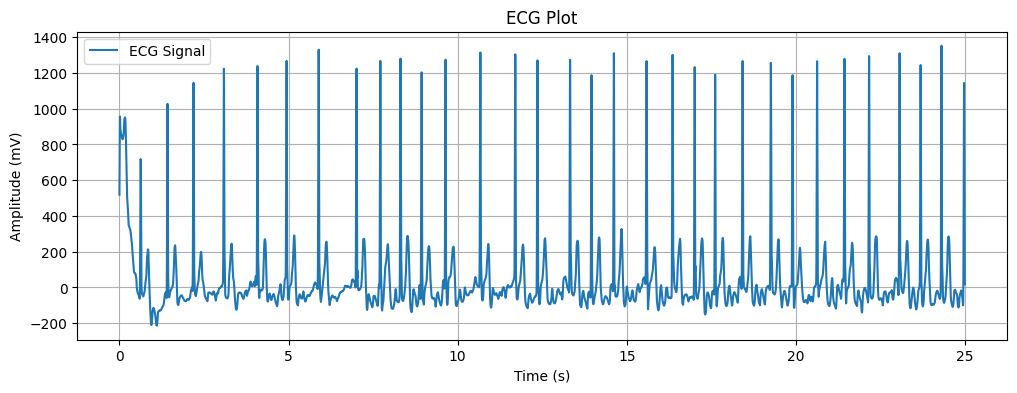

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to load and plot an ECG signal from a .mat file
def plot_ecg_from_mat(mat_file_path, signal_key='val', sampling_rate=360):
    # Load the .mat file
    mat_data = scipy.io.loadmat(mat_file_path)
    
    # Print the keys to help identify the correct one if needed
    print("Keys in the .mat file:", mat_data.keys())
    
    # Extract the ECG signal using the key
    # You might need to replace 'val' with the correct key in your .mat file
    ecg_signal = mat_data[signal_key].squeeze()  # Use .squeeze() if necessary to flatten the array
    
    # Create a time axis for the ECG plot
    time = np.arange(len(ecg_signal)) / sampling_rate  # Time in seconds
    
    # Plot the ECG signal
    plt.figure(figsize=(12, 4))
    plt.plot(time, ecg_signal, label='ECG Signal')
    plt.title('ECG Plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
mat_file_path = './Data/Class_A/A00004.mat' 
plot_ecg_from_mat(mat_file_path, signal_key='val')  # Replace 'your_signal_key' with the key containing the ECG data

## Compare with the data file from the original source

### Method 1: overlay

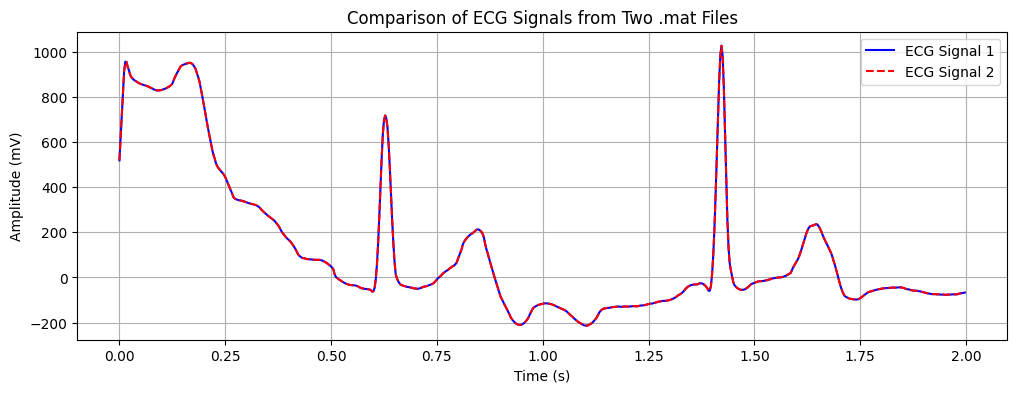

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Function to load and compare ECG signals from two different .mat files
def compare_two_ecg_signals(mat_file_path1, mat_file_path2, signal_key='val', sampling_rate=360, timewindow=720):
    # Load the first ECG signal from .mat file 1
    mat_data1 = scipy.io.loadmat(mat_file_path1)
    ecg_signal1 = mat_data1[signal_key].squeeze()

    # Load the second ECG signal from .mat file 2
    mat_data2 = scipy.io.loadmat(mat_file_path2)
    ecg_signal2 = mat_data2[signal_key].squeeze()

    # Ensure both signals have the same length (truncate if necessary)
    ecg_signal1 = ecg_signal1[:timewindow]
    ecg_signal2 = ecg_signal2[:timewindow]

    # Create a time axis for the plots
    time = np.arange(timewindow) / sampling_rate

    # Plot both ECG signals on the same figure for comparison
    plt.figure(figsize=(12, 4))
    plt.plot(time, ecg_signal1, label='ECG Signal 1', linestyle='-', color='blue')
    plt.plot(time, ecg_signal2, label='ECG Signal 2', linestyle='--', color='red')
    plt.title('Comparison of ECG Signals from Two .mat Files')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
mat_file_path1 = './Data/Class_A/A00004.mat'  # Path to the first .mat file
mat_file_path2 = './Data/Original_data/A00004.mat'  # Path to the second .mat file
compare_two_ecg_signals(mat_file_path1, mat_file_path2)


### Method 2: side by side

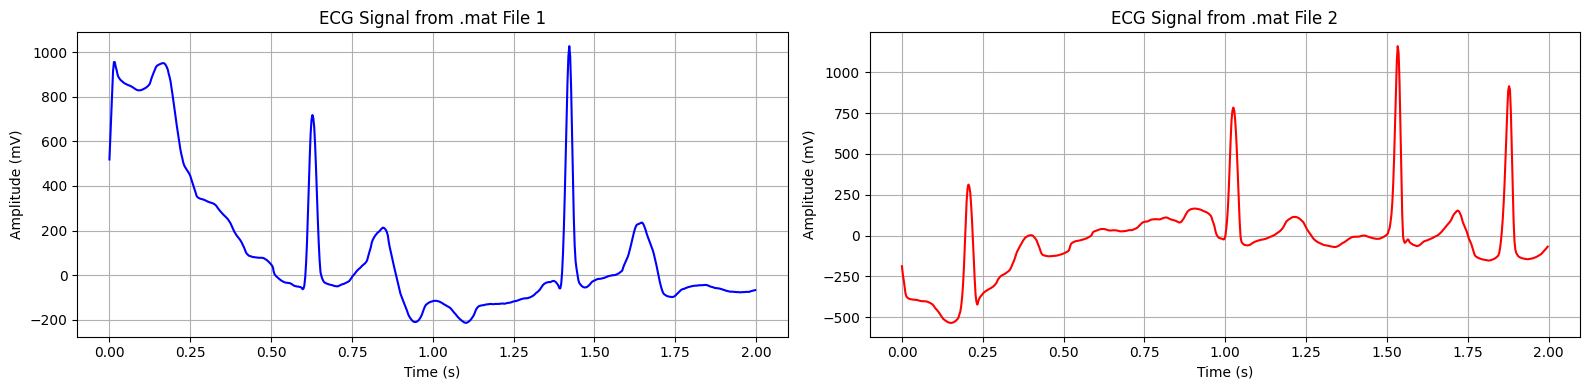

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Function to plot two ECG signals side by side for comparison
def compare_two_ecg_signals_side_by_side(mat_file_path1, mat_file_path2, signal_key='val', sampling_rate=360, timewindow=720):
    # Load the first ECG signal from .mat file 1
    mat_data1 = scipy.io.loadmat(mat_file_path1)
    ecg_signal1 = mat_data1[signal_key].squeeze()

    # Load the second ECG signal from .mat file 2
    mat_data2 = scipy.io.loadmat(mat_file_path2)
    ecg_signal2 = mat_data2[signal_key].squeeze()

    # Ensure both signals have the same length (truncate if necessary)
    ecg_signal1 = ecg_signal1[:timewindow]
    ecg_signal2 = ecg_signal2[:timewindow]

    # Create a time axis for the plots
    time = np.arange(timewindow) / sampling_rate

    # Create side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    # Plot ECG signal from .mat file 1
    axs[0].plot(time, ecg_signal1, color='blue')
    axs[0].set_title('ECG Signal from .mat File 1')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude (mV)')
    axs[0].grid(True)

    # Plot ECG signal from .mat file 2
    axs[1].plot(time, ecg_signal2, color='red')
    axs[1].set_title('ECG Signal from .mat File 2')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude (mV)')
    axs[1].grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage:
mat_file_path1 = './Data/Class_A/A00004.mat'  # Path to the first .mat file
mat_file_path2 = './Data/Class_A/A00005.mat'  # Path to the second .mat file
compare_two_ecg_signals_side_by_side(mat_file_path1, mat_file_path2)


### Check if files are placed in the correct class

In [5]:
import os
import pandas as pd

# Load the CSV file without headers, manually assigning column names
csv_file_path = './References/REFERENCE-v0.csv'  # Replace with your actual CSV file path
# csv_file_path = './References/REFERENCE-original.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file_path, header=None, names=['file_name', 'class'])

# Define your class folders
class_a_folder = './Data/Class_A/'
class_n_folder = './Data/Class_N/'
class_o_folder = './Data/Class_O/'

# Lists to store incorrectly placed and skipped files
incorrect_placement = []
skipped_placement = []

# Check if files are placed in the correct class folders
for _, row in df.iterrows():
    file_name = row['file_name']
    file_class = row['class']

    # Determine the expected folder based on the class
    if file_class == 'A':
        expected_folder = class_a_folder
    elif file_class == 'N':
        expected_folder = class_n_folder
    elif file_class == 'O':
        expected_folder = class_o_folder
    else:
        # Skipped placement due to unknown class
        skipped_placement.append((file_name, file_class))
        print(f"Unknown class '{file_class}' for file '{file_name}'. Skipping.")
        continue

    # Build the expected file path
    expected_file_path = os.path.join(expected_folder, file_name + '.mat')

    # Search for the file across all class folders
    current_location = None
    if os.path.exists(os.path.join(class_a_folder + file_name + '.mat')):
        current_location = os.path.join(class_a_folder + file_name + '.mat')
    elif os.path.exists(os.path.join(class_n_folder + file_name + '.mat')):
        current_location = os.path.join(class_n_folder + file_name + '.mat')
    elif os.path.exists(os.path.join(class_o_folder + file_name + '.mat')):
        current_location = os.path.join(class_o_folder + file_name + '.mat')

    # Check if the file is in the expected folder or elsewhere
    if current_location is None:
        incorrect_placement.append((file_name, expected_file_path, "Missing"))
    elif current_location != expected_file_path:
        incorrect_placement.append((file_name, expected_file_path, current_location))

# Print out the files that are incorrectly placed or missing
if incorrect_placement:
    print("The following files are incorrectly placed or missing:")
    for file_name, expected_path, current_location in incorrect_placement:
        if current_location == "Missing":
            print(f"File '{file_name}' is missing. Expected in: {expected_path}")
        else:
            print(f"File '{file_name}' is in the wrong location. Expected in: {expected_path}, but found in: {current_location}")
else:
    print("All files are correctly placed.")

# Print out the skipped files due to unknown class
if skipped_placement:
    print("The following files were skipped due to unknown class:")
    for file_name, file_class in skipped_placement:
        print(f"File '{file_name}' skipped because of unknown class '{file_class}'.")


Unknown class '~' for file 'A00205'. Skipping.
Unknown class '~' for file 'A00585'. Skipping.
Unknown class '~' for file 'A01006'. Skipping.
Unknown class '~' for file 'A01070'. Skipping.
Unknown class '~' for file 'A01246'. Skipping.
Unknown class '~' for file 'A01299'. Skipping.
Unknown class '~' for file 'A01521'. Skipping.
Unknown class '~' for file 'A01567'. Skipping.
Unknown class '~' for file 'A01707'. Skipping.
Unknown class '~' for file 'A01727'. Skipping.
Unknown class '~' for file 'A01772'. Skipping.
Unknown class '~' for file 'A01833'. Skipping.
Unknown class '~' for file 'A02168'. Skipping.
Unknown class '~' for file 'A02372'. Skipping.
Unknown class '~' for file 'A02772'. Skipping.
Unknown class '~' for file 'A02785'. Skipping.
Unknown class '~' for file 'A02833'. Skipping.
Unknown class '~' for file 'A03549'. Skipping.
Unknown class '~' for file 'A03738'. Skipping.
Unknown class '~' for file 'A04086'. Skipping.
Unknown class '~' for file 'A04137'. Skipping.
Unknown class

### Check skipped files

In [6]:
# Extract just the file names from skipped_placement
skipped_files = [file_name for file_name, _ in skipped_placement]

# Print the skipped files
print(skipped_files)

# Define your class folders
class_a_folder = './Data/Class_A/'
class_n_folder = './Data/Class_N/'
class_o_folder = './Data/Class_O/'

# Function to search for a file in class folders
def find_file_in_folders(file_name, folders):
    for folder in folders:
        file_path = os.path.join(folder, file_name + '.mat')
        if os.path.exists(file_path):
            return folder
    return None

# List to keep track of files found in Class_A or Class_N but should be in Class_O
files_to_move_to_o = []

# Check for each skipped file
for file_name in skipped_files:
    # Search for the file in Class_A, Class_N, and Class_O
    current_folder = find_file_in_folders(file_name, [class_a_folder, class_n_folder, class_o_folder])
    
    if current_folder is None:
        print(f"File '{file_name}' is not found in any class folder.")
    elif current_folder == class_o_folder:
        print(f"File '{file_name}' is already in Class_O.")
    else:
        print(f"File '{file_name}' is in '{current_folder}'. It should be in Class_O.")
        files_to_move_to_o.append(file_name)

# Move the files to Class_O if they are in Class_A or Class_N
for file_name in files_to_move_to_o:
    # Determine the current location
    current_file_path = find_file_in_folders(file_name, [class_a_folder, class_n_folder])
    
    if current_file_path:
        try:
            # Move the file to Class_O
            os.rename(current_file_path + '.mat', os.path.join(class_o_folder, file_name + '.mat'))
            print(f"Moved '{file_name}' to Class_O.")
        except Exception as e:
            print(f"Failed to move '{file_name}' to Class_O: {e}")

['A00205', 'A00585', 'A01006', 'A01070', 'A01246', 'A01299', 'A01521', 'A01567', 'A01707', 'A01727', 'A01772', 'A01833', 'A02168', 'A02372', 'A02772', 'A02785', 'A02833', 'A03549', 'A03738', 'A04086', 'A04137', 'A04170', 'A04186', 'A04216', 'A04282', 'A04452', 'A04522', 'A04701', 'A04735', 'A04805', 'A04948', 'A05365', 'A06435', 'A06776', 'A07136', 'A07138', 'A07139', 'A07320', 'A07322', 'A07724', 'A07727', 'A07794', 'A08021', 'A08035', 'A08112', 'A08160']
File 'A00205' is already in Class_O.
File 'A00585' is already in Class_O.
File 'A01006' is already in Class_O.
File 'A01070' is already in Class_O.
File 'A01246' is already in Class_O.
File 'A01299' is already in Class_O.
File 'A01521' is already in Class_O.
File 'A01567' is already in Class_O.
File 'A01707' is already in Class_O.
File 'A01727' is already in Class_O.
File 'A01772' is already in Class_O.
File 'A01833' is already in Class_O.
File 'A02168' is already in Class_O.
File 'A02372' is already in Class_O.
File 'A02772' is alre

### Now try to put the files into correct folder (both .hea and .mat files)

In [7]:
import shutil

# Load the CSV file without headers, manually assigning column names
csv_file_path = './References/REFERENCE-v0.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file_path, header=None, names=['file_name', 'class'])

# Define your class folders
class_a_folder = './Data/Class_A/'
class_n_folder = './Data/Class_N/'
class_o_folder = './Data/Class_O/'

# Lists to store incorrectly placed and skipped files
incorrect_placement = []
skipped_placement = []

# Check if files are placed in the correct class folders
for _, row in df.iterrows():
    file_name = row['file_name']
    file_class = row['class']

    # Determine the expected folder based on the class
    if file_class == 'A':
        expected_folder = class_a_folder
    elif file_class == 'N':
        expected_folder = class_n_folder
    elif file_class == 'O':
        expected_folder = class_o_folder
    else:
        # Skipped placement due to unknown class
        skipped_placement.append((file_name, file_class))
        print(f"Unknown class '{file_class}' for file '{file_name}'. Skipping.")
        continue

    # Build the expected file paths for both .mat and .hea files
    expected_mat_path = os.path.join(expected_folder, file_name + '.mat')
    expected_hea_path = os.path.join(expected_folder, file_name + '.hea')

    # Search for the files across all class folders
    current_mat_location = None
    current_hea_location = None
    for folder in [class_a_folder, class_n_folder, class_o_folder]:
        mat_path = os.path.join(folder, file_name + '.mat')
        hea_path = os.path.join(folder, file_name + '.hea')

        if os.path.exists(mat_path):
            current_mat_location = mat_path
        if os.path.exists(hea_path):
            current_hea_location = hea_path

    # Check if the files are in the expected folder or elsewhere
    if current_mat_location is None or current_hea_location is None:
        incorrect_placement.append((file_name, expected_mat_path, "Missing"))
    elif current_mat_location != expected_mat_path or current_hea_location != expected_hea_path:
        incorrect_placement.append((file_name, expected_mat_path, current_mat_location, current_hea_location))
        # Move both .mat and .hea files to the correct location
        try:
            if current_mat_location:
                shutil.move(current_mat_location, expected_mat_path)
                print(f"Moved '{file_name}.mat' from {current_mat_location} to {expected_mat_path}")
            if current_hea_location:
                shutil.move(current_hea_location, expected_hea_path)
                print(f"Moved '{file_name}.hea' from {current_hea_location} to {expected_hea_path}")
        except Exception as e:
            print(f"Failed to move '{file_name}' files: {e}")

# Handle skipped files by moving both .mat and .hea files to the 'O' class folder if found in the wrong class folders
for file_name, file_class in skipped_placement:
    # Check if the file is in class_a_folder or class_n_folder
    current_mat_location = find_file_in_folders(file_name + '.mat', [class_a_folder, class_n_folder])
    current_hea_location = find_file_in_folders(file_name + '.hea', [class_a_folder, class_n_folder])

    if current_mat_location or current_hea_location:
        try:
            if current_mat_location:
                shutil.move(current_mat_location, os.path.join(class_o_folder, file_name + '.mat'))
                print(f"Moved skipped file '{file_name}.mat' to Class_O.")
            if current_hea_location:
                shutil.move(current_hea_location, os.path.join(class_o_folder, file_name + '.hea'))
                print(f"Moved skipped file '{file_name}.hea' to Class_O.")
        except Exception as e:
            print(f"Failed to move skipped file '{file_name}' files to Class_O: {e}")
    else:
        print(f"Skipped file '{file_name}' is not found in Class_A or Class_N folders.")

# Print out the files that were incorrectly placed or missing
if incorrect_placement:
    print("The following files are incorrectly placed or missing:")
    for file_name, expected_path, current_mat_location, current_hea_location in incorrect_placement:
        if current_mat_location == "Missing" or current_hea_location == "Missing":
            print(f"File '{file_name}' is missing. Expected in: {expected_path}")
        else:
            print(f"File '{file_name}' was moved from {current_mat_location} and {current_hea_location} to {expected_path}")
else:
    print("All files are correctly placed.")


Moved 'A00005.mat' from ./Data/Class_A/A00005.mat to ./Data/Class_O/A00005.mat
Moved 'A00005.hea' from ./Data/Class_A/A00005.hea to ./Data/Class_O/A00005.hea
Moved 'A00034.mat' from ./Data/Class_O/A00034.mat to ./Data/Class_N/A00034.mat
Moved 'A00034.hea' from ./Data/Class_O/A00034.hea to ./Data/Class_N/A00034.hea
Moved 'A00100.mat' from ./Data/Class_O/A00100.mat to ./Data/Class_A/A00100.mat
Moved 'A00100.hea' from ./Data/Class_O/A00100.hea to ./Data/Class_A/A00100.hea
Moved 'A00106.mat' from ./Data/Class_O/A00106.mat to ./Data/Class_N/A00106.mat
Moved 'A00106.hea' from ./Data/Class_O/A00106.hea to ./Data/Class_N/A00106.hea
Moved 'A00125.mat' from ./Data/Class_O/A00125.mat to ./Data/Class_N/A00125.mat
Moved 'A00125.hea' from ./Data/Class_O/A00125.hea to ./Data/Class_N/A00125.hea
Moved 'A00164.mat' from ./Data/Class_O/A00164.mat to ./Data/Class_A/A00164.mat
Moved 'A00164.hea' from ./Data/Class_O/A00164.hea to ./Data/Class_A/A00164.hea
Moved 'A00192.mat' from ./Data/Class_N/A00192.mat to

### Check again if all files are put correctly

In [8]:
# Lists to store incorrectly placed and skipped files
incorrect_placement = []
skipped_placement = []

# Check if files are placed in the correct class folders
for _, row in df.iterrows():
    file_name = row['file_name']
    file_class = row['class']

    # Determine the expected folder based on the class
    if file_class == 'A':
        expected_folder = class_a_folder
    elif file_class == 'N':
        expected_folder = class_n_folder
    elif file_class == 'O':
        expected_folder = class_o_folder
    else:
        # Skipped placement due to unknown class
        skipped_placement.append((file_name, file_class))
        print(f"Unknown class '{file_class}' for file '{file_name}'. Skipping.")
        continue

    # Build the expected file paths for both .mat and .hea files
    expected_mat_path = os.path.join(expected_folder, file_name + '.mat')
    expected_hea_path = os.path.join(expected_folder, file_name + '.hea')

    # Search for the .mat and .hea files across all class folders
    current_mat_location = None
    current_hea_location = None

    for folder in [class_a_folder, class_n_folder, class_o_folder]:
        mat_path = os.path.join(folder, file_name + '.mat')
        hea_path = os.path.join(folder, file_name + '.hea')

        if os.path.exists(mat_path):
            current_mat_location = mat_path
        if os.path.exists(hea_path):
            current_hea_location = hea_path

    # Check if the .mat or .hea files are in the expected folder or elsewhere
    if current_mat_location is None or current_hea_location is None:
        incorrect_placement.append((file_name, expected_mat_path, expected_hea_path, "Missing"))
    elif current_mat_location != expected_mat_path or current_hea_location != expected_hea_path:
        incorrect_placement.append((file_name, expected_mat_path, expected_hea_path, current_mat_location, current_hea_location))

# Print out the files that are incorrectly placed or missing
if incorrect_placement:
    print("The following files are incorrectly placed or missing:")
    for file_info in incorrect_placement:
        file_name = file_info[0]
        expected_mat_path = file_info[1]
        expected_hea_path = file_info[2]
        current_mat_location = file_info[3]
        current_hea_location = file_info[4] if len(file_info) > 4 else None

        if current_mat_location == "Missing" or current_hea_location == "Missing":
            print(f"File '{file_name}' is missing. Expected .mat in: {expected_mat_path}, .hea in: {expected_hea_path}")
        else:
            print(f"File '{file_name}' is in the wrong location.")
            print(f"Expected .mat in: {expected_mat_path}, but found in: {current_mat_location}")
            print(f"Expected .hea in: {expected_hea_path}, but found in: {current_hea_location}")
else:
    print("All files are correctly placed.")

# Print out the skipped files due to unknown class
if skipped_placement:
    print("The following files were skipped due to unknown class:")
    for file_name, file_class in skipped_placement:
        print(f"File '{file_name}' skipped because of unknown class '{file_class}'.")


Unknown class '~' for file 'A00205'. Skipping.
Unknown class '~' for file 'A00585'. Skipping.
Unknown class '~' for file 'A01006'. Skipping.
Unknown class '~' for file 'A01070'. Skipping.
Unknown class '~' for file 'A01246'. Skipping.
Unknown class '~' for file 'A01299'. Skipping.
Unknown class '~' for file 'A01521'. Skipping.
Unknown class '~' for file 'A01567'. Skipping.
Unknown class '~' for file 'A01707'. Skipping.
Unknown class '~' for file 'A01727'. Skipping.
Unknown class '~' for file 'A01772'. Skipping.
Unknown class '~' for file 'A01833'. Skipping.
Unknown class '~' for file 'A02168'. Skipping.
Unknown class '~' for file 'A02372'. Skipping.
Unknown class '~' for file 'A02772'. Skipping.
Unknown class '~' for file 'A02785'. Skipping.
Unknown class '~' for file 'A02833'. Skipping.
Unknown class '~' for file 'A03549'. Skipping.
Unknown class '~' for file 'A03738'. Skipping.
Unknown class '~' for file 'A04086'. Skipping.
Unknown class '~' for file 'A04137'. Skipping.
Unknown class